In [1]:
import pandas as pd
import os
#from fastai.vision.all import *
from fastai.tabular.all import *

C:\Users\bowan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_path = '../image_data_assorted.csv'
df = pd.read_csv(df_path)

In [3]:
df.head()

,Radius,X_Position,Y_Position,Area,Surface2d,Volume,image_path,mask_path,shape
0,83,339,254,3444,283,571787,images_assorted/image_1.png,masks_assorted/mask_1.png,triange
1,67,203,421,2244,229,300763,images_assorted/image_2.png,masks_assorted/mask_2.png,triange
2,61,231,360,3721,244,226981,images_assorted/image_3.png,masks_assorted/mask_3.png,square
3,51,227,376,8167,160,555366,images_assorted/image_4.png,masks_assorted/mask_4.png,circle
4,57,347,420,3249,228,185193,images_assorted/image_5.png,masks_assorted/mask_5.png,square


In [4]:
columns = df.columns


batch_size = 64      # where you declare batch size
#cat_names  = [.....] # insert column names to use as inputs with categorical data here 
cont_names = [col for col in columns if col != 'shape'] # removes shapes column data
cont_names = [col for col in cont_names if col != 'image_path'] # removes image_path column data
cont_names = [col for col in cont_names if col != 'mask_path'] # removes mask_path column data
cont_names = [col for col in cont_names if col != 'Radius'] # removes mask_path column data


cat_names = [] # insert column names to use as inputs with Numerical values here
target = 'Radius'

In [5]:
print(cat_names)
print(cont_names)

[]
['X_Position', 'Y_Position', 'Area', 'Surface2d', 'Volume']


In [6]:
print(df.dtypes)

Radius         int64
X_Position     int64
Y_Position     int64
Area           int64
Surface2d      int64
Volume         int64
image_path    object
mask_path     object
shape         object
dtype: object


In [7]:
dls = TabularDataLoaders.from_csv( 
df_path,                    # Path to the CSV file 
y_names=target,             # Name of the target column 
cat_names=cat_names,        # List of categorical data column names 
cont_names=cont_names,      # List of continuous values column names 
bs=batch_size               # Batch size
)

In [8]:
dls.show_batch()

,X_Position,Y_Position,Area,Surface2d,Volume,Radius
0,117.0,371.0,480.0,106.0,29791.0,31.0
1,139.0,96.0,144.0,58.0,4913.0,17.0
2,282.0,337.0,722.0,130.0,54872.0,38.0
3,140.0,129.0,128.0,55.0,4096.0,16.0
4,156.0,223.0,324.0,72.0,5832.0,18.0
5,134.0,337.0,8464.0,368.0,778688.0,92.0
6,255.0,242.0,1104.0,160.0,103823.0,47.0
7,396.0,355.0,25434.0,283.0,3052080.0,90.0
8,358.0,425.0,5539.0,132.0,310182.0,42.0
9,181.0,309.0,1962.0,78.0,65417.0,25.0


In [9]:
#model = Simplemodel()  # Note the parentheses , metrics=rmse
#learn = Learner(dls, model,loss_func=CrossEntropyLossFlat())

learn = tabular_learner(dls, layers=[200, 200 ,200], metrics=rmse)
#learn.loss_func = nn.MSELoss()  # or a custom loss function

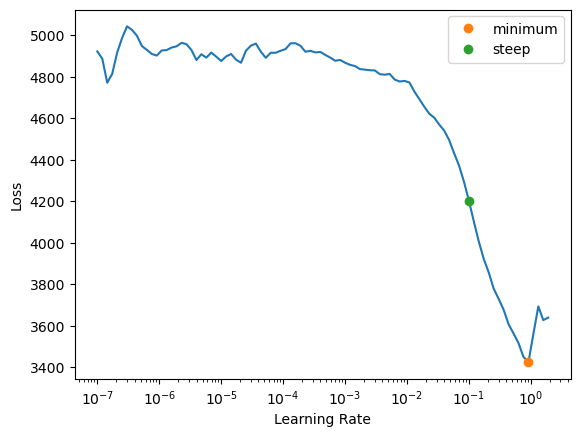

In [10]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [11]:

learn.fit_one_cycle(200,lr_max=lr_steep)

epoch,train_loss,valid_loss,_rmse,time
0,4540.871094,3520.395996,59.332928,00:00
1,4284.433594,3415.600586,58.443142,00:00
2,4023.339355,3365.012695,58.008728,00:00
3,3775.362061,2925.094727,54.084145,00:00
4,3502.520020,2433.513184,49.330650,00:00
5,3180.916992,1681.634644,41.007740,00:00
6,2705.569824,889.353699,29.822031,00:00
7,2136.902100,25.990351,5.098073,00:00
8,1640.203369,153.316772,12.382114,00:00
9,1302.084839,202.047974,14.214358,00:00


<bound method Recorder.plot_loss of Recorder>


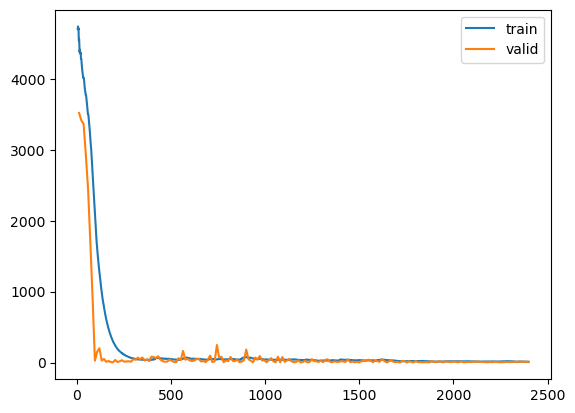

In [12]:
# Plot the losses
learn.recorder.plot_loss()
print(learn.recorder.plot_loss)
# Set the y-axis limits (replace with your desired limits)
#plt.ylim(0, 5)  # sets y-axis limits 
# Show the plot with updated y-limits
plt.show()

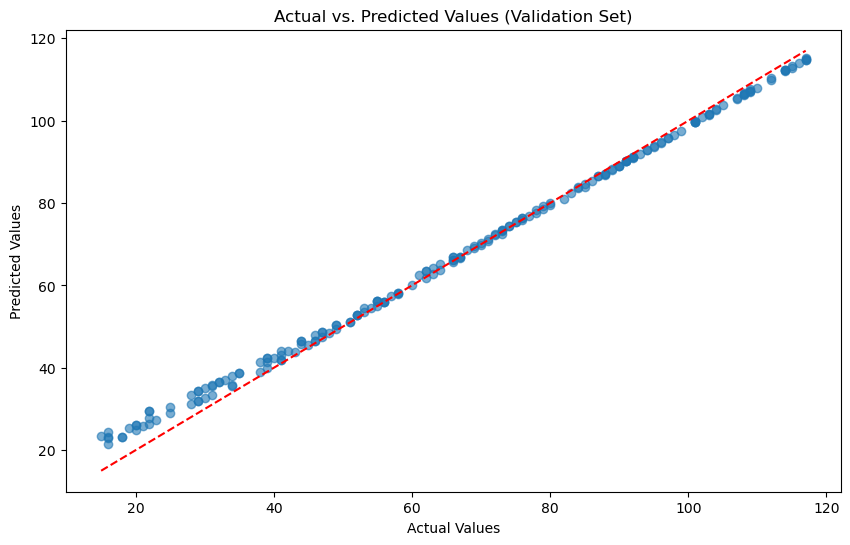

In [13]:

# extract predictions vs target value for the validatin dataset
preds, targets = learn.get_preds(ds_idx=1)  # ds_idx=1 for the validation set


import matplotlib.pyplot as plt

# Convert tensors to numpy arrays if necessary
actual_values = targets.numpy()
predicted_values = preds.numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Validation Set)')
plt.show()

In [14]:


learn.export('exported_classification_tabular_model.pkl')
 


In [15]:
# import

learn2 = load_learner('exported_classification_tabular_model.pkl')   # using learner2 to show its loading

In [19]:

# Get the nth row (e.g., 2nd row)
n = 6  # Remember, indexing starts at 0
nth_row = df.iloc[n]

print(nth_row)
# Ensure continuous variables are float32
for cont_name in learn2.dls.cont_names:
    nth_row[cont_name] = float(nth_row[cont_name])

# Ensure categorical variables are strings (or proper categories)
for cat_name in learn2.dls.cat_names:
    nth_row[cat_name] = str(nth_row[cat_name])  # Convert to string if necessary



Prediction, ClassID, Confidence =learn2.predict(nth_row)

# just getting a random image from df
image_paths = df['image_path']
image_data = PILImage.create('../'+image_paths[n])


Radius                                 78
X_Position                            381
Y_Position                            319
Area                                 3042
Surface2d                             266
Volume                             474552
image_path    images_assorted/image_7.png
mask_path       masks_assorted/mask_7.png
shape                             triange
Name: 6, dtype: object


SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [ ]:
print(Prediction)
print(ClassID)
print(Confidence)

<Axes: >

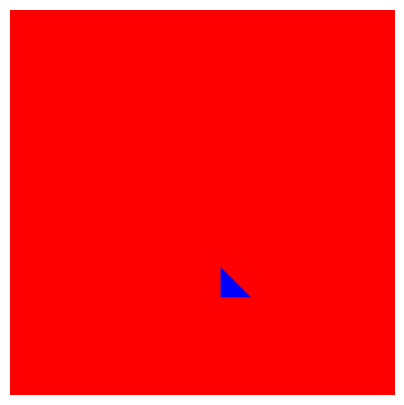

In [54]:
image_data.show()